In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

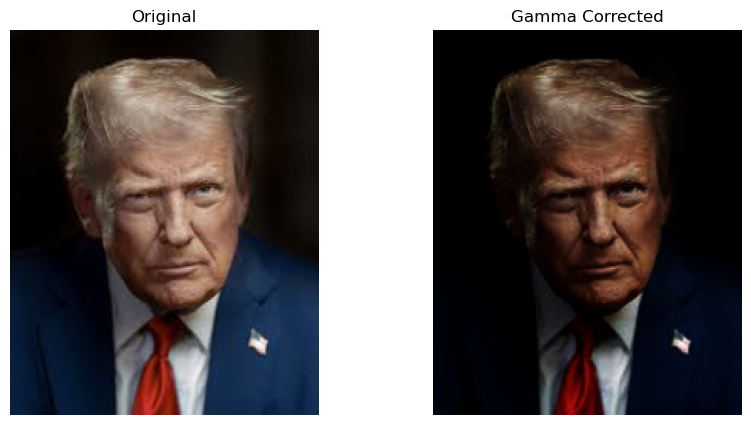

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma):
    if image is None:
        raise ValueError("Image is None")

    if gamma <= 0:
        raise ValueError("Gamma must be positive")

    img = image.astype(np.float32) / 255.0
    corrected = np.power(img, gamma)
    corrected = np.uint8(corrected * 255)

    return corrected


# Example usage
image = cv2.imread("trump.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

corrected = gamma_correction(image, 2.0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(corrected)
plt.title("Gamma Corrected")
plt.axis("off")
plt.show()

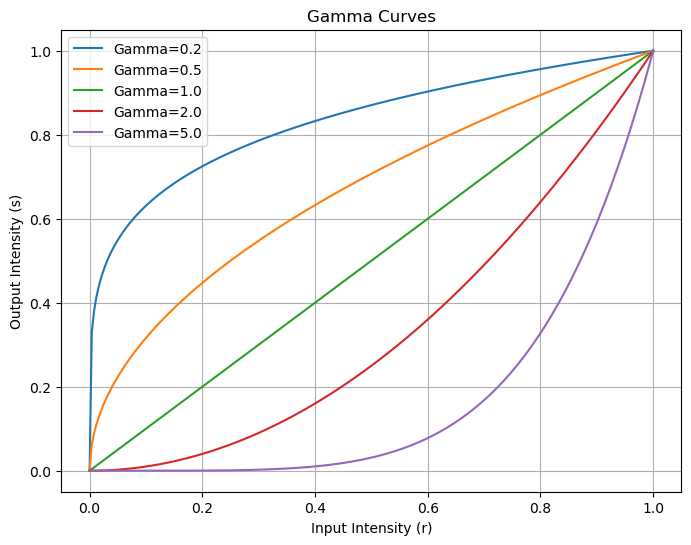

In [3]:
r = np.linspace(0, 1, 256)
gamma_values = [0.2, 0.5, 1.0, 2.0, 5.0]

plt.figure(figsize=(8,6))
for g in gamma_values:
    s = np.power(r, g)
    plt.plot(r, s, label=f"Gamma={g}")

plt.xlabel("Input Intensity (r)")
plt.ylabel("Output Intensity (s)")
plt.title("Gamma Curves")
plt.legend()
plt.grid()
plt.show()

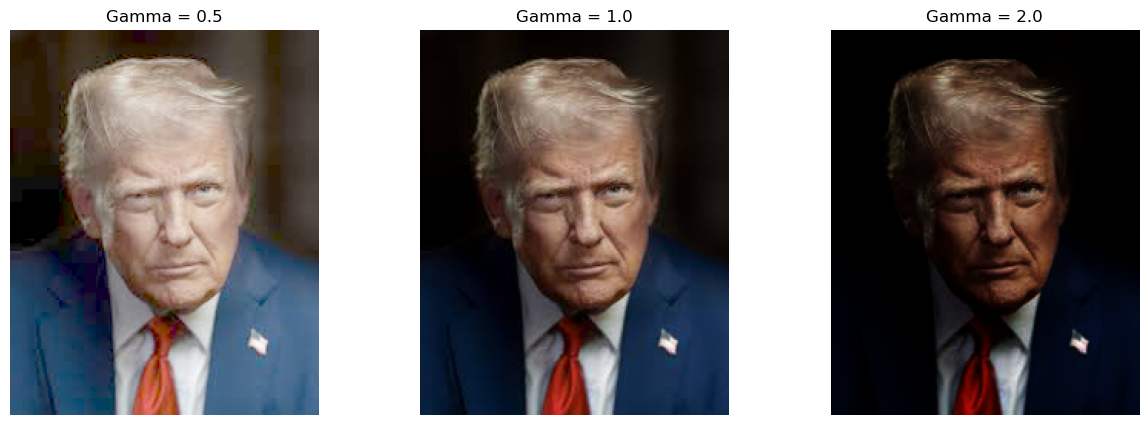

In [4]:
gammas = [0.5, 1.0, 2.0]

plt.figure(figsize=(15,5))

for i, g in enumerate(gammas):
    result = gamma_correction(image, g)
    plt.subplot(1,3,i+1)
    plt.imshow(result)
    plt.title(f"Gamma = {g}")
    plt.axis("off")

plt.show()

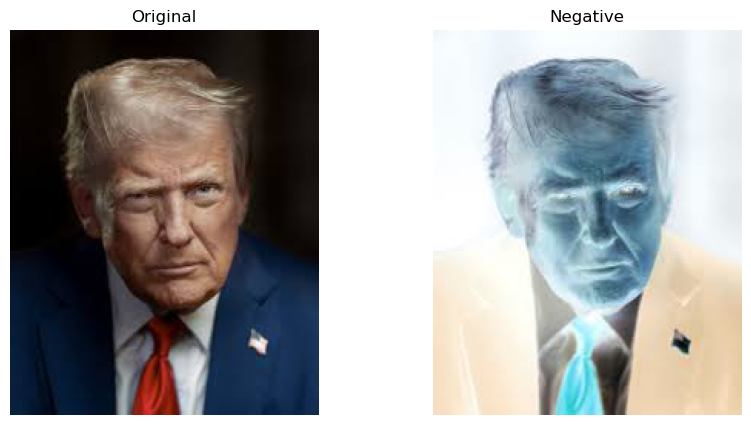

In [5]:
def image_negative(image):
    if image is None:
        raise ValueError("Image is None")

    negative = 255 - image
    return negative


negative_img = image_negative(image)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(negative_img)
plt.title("Negative")
plt.axis("off")
plt.show()


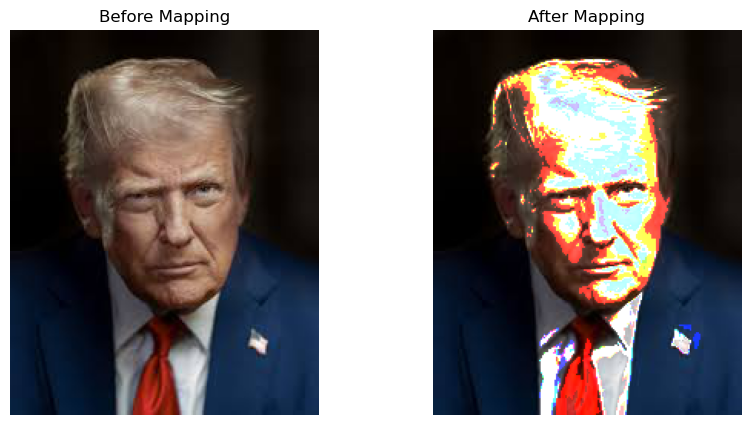

In [6]:
def intensity_range_mapping(image, A, B):
    if A < 0 or B > 255 or A > B:
        raise ValueError("Invalid intensity range")

    result = image.copy()

    mask = (result >= A) & (result <= B)
    result[mask] = 255

    return result


mapped = intensity_range_mapping(image, 100, 180)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Before Mapping")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mapped)
plt.title("After Mapping")
plt.axis("off")
plt.show()

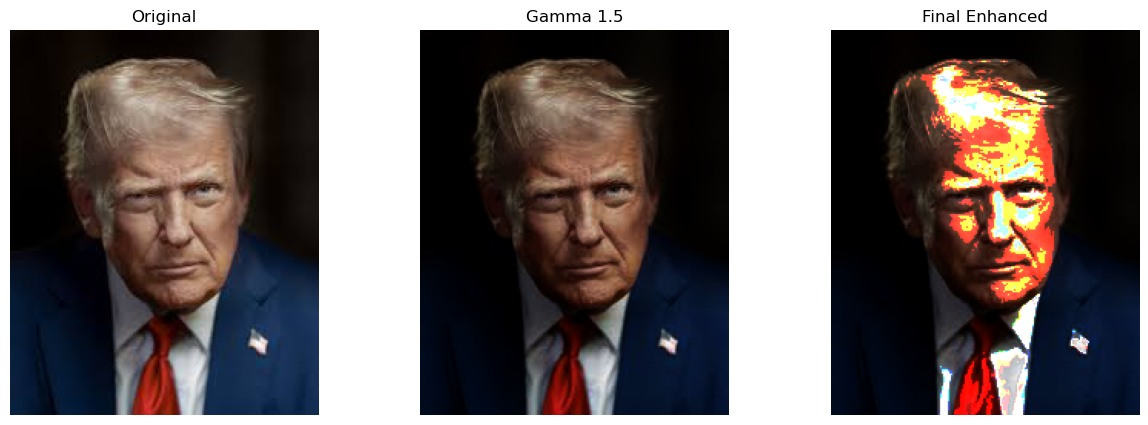

In [7]:
def enhancement_pipeline(path, gamma, A, B):
    img = cv2.imread(path)

    if img is None:
        raise ValueError("Image not found")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    gamma_img = gamma_correction(img, gamma)
    final_img = intensity_range_mapping(gamma_img, A, B)

    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(gamma_img)
    plt.title(f"Gamma {gamma}")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(final_img)
    plt.title("Final Enhanced")
    plt.axis("off")

    plt.show()


enhancement_pipeline("trump.jpg", 1.5, 100, 180)

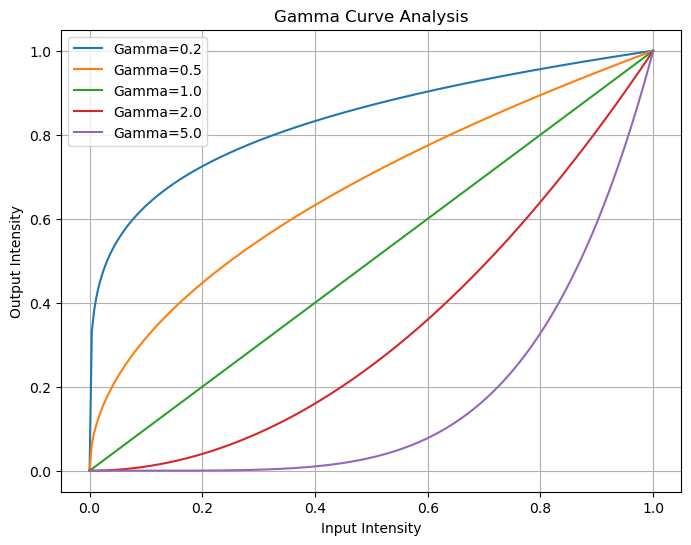

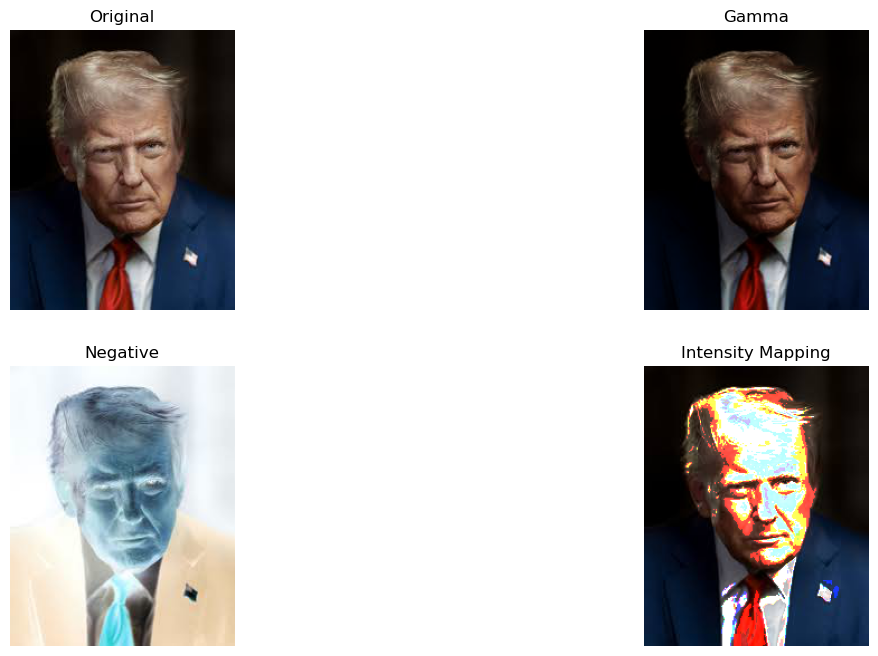

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def validate_image(image):
    if image is None:
        raise ValueError("Image is None")
    if not isinstance(image, np.ndarray):
        raise TypeError("Input must be numpy array")


def gamma_correction(image, gamma):
    validate_image(image)
    if gamma <= 0:
        raise ValueError("Gamma must be positive")

    img = image.astype(np.float32) / 255.0
    corrected = np.power(img, gamma)
    return np.uint8(corrected * 255)


def image_negative(image):
    validate_image(image)
    return 255 - image


def intensity_range_mapping(image, A, B):
    validate_image(image)

    if A < 0 or B > 255 or A > B:
        raise ValueError("Invalid intensity range")

    result = image.copy()
    mask = (result >= A) & (result <= B)
    result[mask] = 255
    return result


def gamma_analysis():
    r = np.linspace(0, 1, 256)
    gammas = [0.2, 0.5, 1.0, 2.0, 5.0]

    plt.figure(figsize=(8,6))
    for g in gammas:
        plt.plot(r, np.power(r, g), label=f"Gamma={g}")

    plt.title("Gamma Curve Analysis")
    plt.xlabel("Input Intensity")
    plt.ylabel("Output Intensity")
    plt.legend()
    plt.grid()
    plt.show()


def full_demo(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    gamma_img = gamma_correction(img, 1.5)
    negative_img = image_negative(img)
    mapped_img = intensity_range_mapping(img, 100, 180)

    plt.figure(figsize=(15,8))

    plt.subplot(2,2,1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(2,2,2)
    plt.imshow(gamma_img)
    plt.title("Gamma")
    plt.axis("off")

    plt.subplot(2,2,3)
    plt.imshow(negative_img)
    plt.title("Negative")
    plt.axis("off")

    plt.subplot(2,2,4)
    plt.imshow(mapped_img)
    plt.title("Intensity Mapping")
    plt.axis("off")

    plt.show()


gamma_analysis()
full_demo("trump.jpg")